<a href="https://colab.research.google.com/github/abdullahsaqib112/House-Price-Prediction---A-regression-Problem/blob/main/Predicting_House_Price_A_regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation. This is easily done in Numpy.

In [5]:
#Normalization data in a regression problem where 

#Standard Deviation :
#a quantity expressing by how much the members of a group differ from the mean value for the group
#If we minus mean value from data and divide by standard deviation the data will be centered at zero

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

#Note that the quantities used for normalizing the test data are computed using the
#training data. You should never use in your workflow any quantity computed on the
#test data, even for something as simple as data normalization

test_data -= mean
test_data /= std



In [6]:
#building our network

from keras import models
from keras import layers

#since we have to use this approach multiple times so we build a function

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  #Compilation step
  model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
  return model



In [7]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

all_mae_histories=[]

for i in range (k):
  print("processing Fold #", i)
  val_data= train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_target= train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]],
                                      axis = 0)
  
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],
                                        axis = 0)
  

  model = build_model()

  history = model.fit(partial_train_data,
                      partial_train_targets,
                      validation_data=(val_data, val_target),
                      epochs = num_epochs,
                      batch_size = 1 , verbose = 0)
  
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


processing Fold # 0
processing Fold # 1
processing Fold # 2
processing Fold # 3


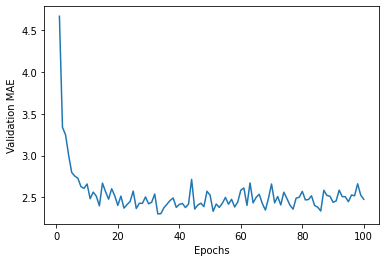

In [8]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

processing Fold # 0
processing Fold # 1
processing Fold # 2
processing Fold # 3


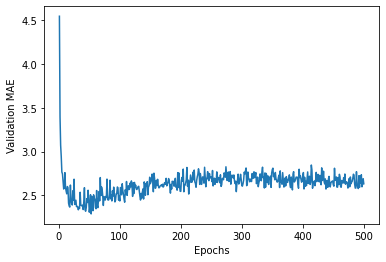

In [9]:
#trying with different number of epochs

import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

all_mae_histories=[]

for i in range (k):
  print("processing Fold #", i)
  val_data= train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_target= train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]],
                                      axis = 0)
  
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],
                                        axis = 0)
  

  model = build_model()

  history = model.fit(partial_train_data,
                      partial_train_targets,
                      validation_data=(val_data, val_target),
                      epochs = num_epochs,
                      batch_size = 1 , verbose = 0)
  
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


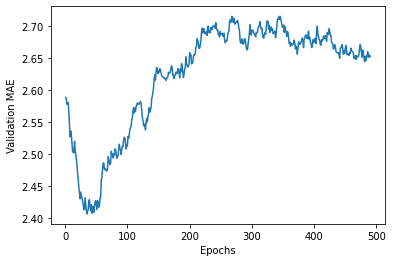

In [10]:
def smooth_curve(points, factor=0.9):
  smooth_points= []
  for point in points:
    if smooth_points:
      previous = smooth_points[-1]
      smooth_points.append(previous * factor + point * (1 - factor))
    else:
      smooth_points.append(point)
  return smooth_points


smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show() 

In [11]:
model = build_model()
model.fit(train_data, train_targets, epochs= 80, batch_size=16, verbose=0)
test_mse_score , test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.3424 - mae: 2.5527


In [12]:
test_mae_score

2.552738904953003